In [1]:
import numpy as np
import random

import tensorflow as tf

import keras
from keras import datasets, layers, models

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

from PIL import Image, ImageDraw

import json

C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

In [2]:
print(keras.__version__)

2.3.1


In [2]:
train_data, train_label = [], []
test_data, test_label = [], []
w = 400
h = 300

files = ['far.json', 'close.json']
for f in files:
    quota = 2000
    with open('plate_data/collected/' + f) as json_file:
        data = json.load(json_file)
        
        plates = []; index = {}
        for p in data:
            plates.append(p)
            index[p] = 0

        it = 0
        while quota > 0:
            cur_p = plates[it]
            img_name = list(data[cur_p])[index[cur_p]]

            # adding the image to dataset
            im = Image.open('plate_data/collected/' + cur_p + '/' + img_name)
            coord = [0, 0, 0, 0]
            counter = 0
            for arr in data[cur_p][img_name]:
                coord[counter] = arr[0] / im.size[0]
                coord[counter + 1] = arr[1] / im.size[1]
                counter += 2
            # resize
            im.thumbnail((w, h))
            # add image 
            train_data.append(np.asarray(im) / 255)
            # add label
            train_label.append(np.array(coord))

            quota -= 1
            index[cur_p] += 1
            if index[cur_p] >= len(data[cur_p]):
                index.pop(cur_p)
                plates.remove(cur_p)
            else:
                it += 1
            if it >= len(plates):
                it = 0

        
# with open('plate_data/collected/far.json') as json_file:
    
#     data = json.load(json_file)
#     for plate in data: # plate is the actual license plate number
#         limit = 0
#         for img in data[plate]: # img is the name of the JPEG file
#             im = Image.open('plate_data/collected/' + plate + '/' + img)

#             coord = [0, 0, 0, 0]
#             counter = 0
#             for arr in data[plate][img]:
#                 coord[counter] = arr[0] / im.size[0]
#                 coord[counter + 1] = arr[1] / im.size[1]
#                 counter += 2
#             # resize
#             im.thumbnail((w, h))
        
#             # add image 
#             train_data.append(np.asarray(im) / 255)
#             # add label
#             train_label.append(np.array(coord))
            
#             limit += 1
#             # print(limit)
#             if limit > 200:
#                 break
            

# generate test images
for i in range(300):
    foo = random.randint(0, len(train_data) - 1)
    
    test_data.append(train_data[foo])
    test_label.append(train_label[foo])
    
    train_data.pop(foo)
    train_label.pop(foo)
    
train_data, test_data = np.array(train_data), np.array(test_data)
train_label, test_label = np.array(train_label), np.array(test_label)
# convert to between 0 and 1
# train_data, test_data, val_data = train_data / 255, test_data / 255, val_data / 255

print(train_data.shape)
print(test_data.shape)

(3700, 300, 400, 3)
(300, 300, 400, 3)


In [3]:
print(train_label[3])

[0.21670082 0.55430328 0.45517418 0.4409153 ]


In [3]:
keras.backend.clear_session()
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(h, w, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2))) 
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(4, activation='sigmoid'))
input_shape = (h, w, 3)
model = models.Sequential([
layers.Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
layers.Conv2D(128, (3, 3), activation='relu', padding='same'),   
layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
layers.Flatten(),
layers.Dense(496, activation='relu'),
# layers.Dropout(0.20),    
layers.Dense(496, activation='relu'),
# layers.Dropout(0.20),
layers.Dense(4, activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
def IoU(rect1, rect2): ## (((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)))
    dx = min(max(rect1[0][0], rect1[1][0]), max(rect2[0][0], rect2[1][0])) - max(min(rect1[0][0], rect1[1][0]), min(rect2[0][0], rect2[1][0]))
    dy = min(max(rect1[0][1], rect1[1][1]), max(rect2[0][1], rect2[1][1])) - max(min(rect1[0][1], rect1[1][1]), min(rect2[0][1], rect2[1][1]))
    inter = 0
    if(dx >= 0 and dy >= 0):
        inter = dx * dy
    else:
        return 0
    union = abs(rect1[0][0] - rect1[1][0]) * abs(rect1[0][1] - rect1[1][1]) + abs(rect2[0][0] - rect2[1][0]) * abs(rect2[0][1] - rect2[1][1]) - inter
    return inter / union

def IoUbatch(y_true, y_pred):
    results = []
    y_true = y_true.astype(np.float32)
    y_pred = y_pred.astype(np.float32)
    for i in range(y_true.shape[0]):
        rect1 = ((y_true[i, 0] * w, y_true[i, 1] * h), (y_true[i, 2] * w, y_true[i, 3] * h))
        rect2 = ((y_pred[i, 0] * w, y_pred[i, 1] * h), (y_pred[i, 2] * w, y_pred[i, 3] * h))
        results.append(np.float32(IoU(rect1, rect2)))
    return np.mean(results)

def IoUMetric(y_true, y_pred):
    return tf.py_func(IoUbatch, [y_true, y_pred], tf.float32)
        

In [5]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("model_v3_3.h5", monitor='val_IoUMetric', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_IoUMetric', min_delta=0, patience=10, verbose=1, mode='max')

In [6]:
model.compile(optimizer='adam', loss='logcosh', metrics=['accuracy', IoUMetric])

# best val_IoU previously: 0.64085
model.load_weights("model_v3_2.h5")

model.fit(x = train_data, y = train_label, validation_split = 0.1, epochs=50, callbacks = [checkpoint, early])

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, use
    tf.py_function, which takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    
Instructions for updating:
Use tf.cast instead.
Train on 3330 samples, validate on 370 samples
Epoch 1/50
3330/3330 [==============================] - 1938s 582ms/step - loss: 7.8052e-05 - accuracy: 0.9775 - IoUMetric: 0.8186 - val_loss: 8.4470e-05 - val_accuracy: 0.9703 - val_IoUMetric: 0.8611

Epoch 00001: val_IoUMetric improved from -inf to 0.86111, saving model to model_v3_3.h5
Epoch 2/50
3330/3330 [==============================] - 1791s 538ms/step - loss: 5.1837e-05 - accuracy: 0.9835 - IoUMetric: 0.8390 - val_loss: 3.7788e-04 - val_accuracy: 0.9622 - va

KeyboardInterrupt: 

In [7]:
json_file = open('model_v3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = models.model_from_json(loaded_model_json)
model.load_weights("model_v3_3.h5")

In [10]:
padding = 3

acc = 0
for i in range(300):
    out = model.predict([[train_data[i]]])[0]
    x1, y1, x2, y2 = out[0] * w, out[1] * h, out[2] * w, out[3] * h # model 2
    a1, b1, a2, b2 = train_label[i][0] * w, train_label[i][1] * h, train_label[i][2] * w, train_label[i][3] * h
    acc += IoU(((x1, y1), (x2, y2)), ((a1, b1), (a2, b2)))
    print(IoU(((x1, y1), (x2, y2)), ((a1, b1), (a2, b2))))
print(acc / 300)
    
# rect1 = patches.Rectangle((x1,y1), padding, padding, linewidth=1,edgecolor='r',facecolor='r')
# rect2 = patches.Rectangle((x2,y2), padding, padding, linewidth=1,edgecolor='r',facecolor='r')
# rect3 = patches.Rectangle((a1,b1), padding, padding, linewidth=1,edgecolor='c',facecolor='c')
# rect4 = patches.Rectangle((a2,b2), padding, padding, linewidth=1,edgecolor='c',facecolor='c')

# plt.figure()
# fig, ax = plt.subplots(1)
# ax.imshow(train_data[idx])
# ax.add_patch(rect1); ax.add_patch(rect2); ax.add_patch(rect3); ax.add_patch(rect4)
# plt.show()

0.8108257141317057
0.7523443869513994
0.8340694133029232
0.8262008103000581
0.908777764504338
0.9568088424945752
0.8177849823418333
0.8589279765096943
0.9423315478128513
0.8385784607526013
0.8989980717014415
0.7955651516440903
0.8969053930992068
0.9393430198341699
0.8641306966026082
0.918443206611032
0.9390755177719804
0.91035538846956
0.8273627544361074
0.8827861351768435
0.880612697850323
0.8363643366751341
0.8402041542119381
0.9294597402781387
0.8384410476822114
0.9450704390315663
0.8519758632062971
0.8315606426856479
0.8529390076692788
0.8514489671395444
0.9334152120344911
0.9471934301247418
0.801035526005874
0.9034637929818881
0.9229476204688526
0.8768513669595384
0.844668754660575
0.8883874478985669
0.792856856820629
0.8719203917465461
0.9173861015991541
0.9637076890838667
0.9328826174506611
0.8553488412186285
0.8221230836878624
0.8979649380208081
0.8640501001212765
0.9386270546253113
0.8760952856607376
0.8152156591322067
0.8667618879802561
0.8648363735353034
0.9027836160718741
0

<Figure size 432x288 with 0 Axes>

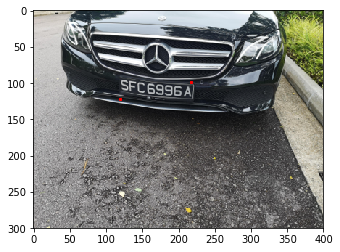

In [8]:
idx = 2
# im = Image.fromarray(train_data[0] * 255)
# draw = ImageDraw.Draw(im)
x1, y1, x2, y2= train_label[idx][0] * w, train_label[idx][1] * h, train_label[idx][2] * w, train_label[idx][3] * h # model 2
padding = 3
# draw.rectangle((x1 + padding, y1 + padding, x1 - padding, y1 - padding), (244,232,46))
# draw.rectangle((x2 + padding, y2 + padding, x2 - padding, y2 - padding), (244,232,46))

rect1 = patches.Rectangle((x1,y1), padding, padding, linewidth=1,edgecolor='r',facecolor='r')
rect2 = patches.Rectangle((x2,y2), padding, padding, linewidth=1,edgecolor='r',facecolor='r')

plt.figure()
fig, ax = plt.subplots(1)
ax.imshow(train_data[idx])
ax.add_patch(rect1); ax.add_patch(rect2)
plt.show()

1.574786


<Figure size 432x288 with 0 Axes>

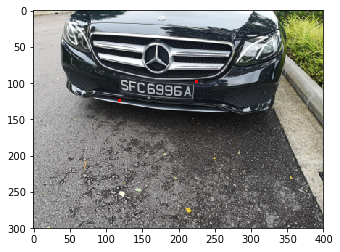

In [9]:
out = model.predict([[train_data[idx]]])[0]
print(out[0] + out[1] + out[2] + out[3])
x1, y1, x2, y2= out[0] * w, out[1] * h, out[2] * w, out[3] * h # model 2

rect1 = patches.Rectangle((x1,y1), padding, padding, linewidth=1,edgecolor='r',facecolor='r')
rect2 = patches.Rectangle((x2,y2), padding, padding, linewidth=1,edgecolor='r',facecolor='r')

plt.figure()
fig, ax = plt.subplots(1)
ax.imshow(train_data[idx])
ax.add_patch(rect1); ax.add_patch(rect2)
plt.show()

<Figure size 432x288 with 0 Axes>

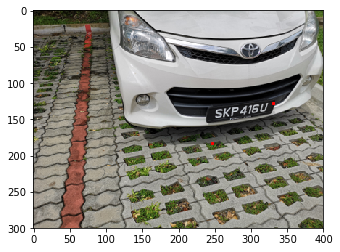

In [49]:
w = 400
h = 300

# json_file = open('model_v2.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# model = models.model_from_json(loaded_model_json)
# model.load_weights("model_v2.h5")

img = "plate_data/collected/SKP416U/IMG_20190612_112716.JPG"
im = Image.open(img)
im.thumbnail((w, h))

ini = np.array([np.asarray(im)]) / 255
out = model.predict(ini)[0]

#x1, y1 = out[0] * im.size[0], out[1] * im.size[1] # model 1
x1, y1, x2, y2= out[0] * im.size[0], out[1] * im.size[1], out[2] * im.size[0], out[3] * im.size[1] # model 2

rect1 = patches.Rectangle((x1,y1), padding, padding, linewidth=1,edgecolor='r',facecolor='r')
rect2 = patches.Rectangle((x2,y2), padding, padding, linewidth=1,edgecolor='r',facecolor='r')

plt.figure()
fig, ax = plt.subplots(1)
ax.imshow(np.asarray(im))
ax.add_patch(rect1); ax.add_patch(rect2)
plt.show()

In [50]:
# serialize model to JSON
model_json = model.to_json()
with open("model_v3.json", "w") as json_file:
    json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model_v2.h5")
# print("Saved model to disk")